In [ ]:
import pandas as pd

Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
top_data_df=pd.read_csv('/content/drive/MyDrive/Untitled folder/yelp.csv')

In [ ]:
print(top_data_df.columns)

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [ ]:
top_data_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
top_data_df.shape

(10000, 10)

CREATING A CLASS CALLED SENTIMENT:


After the data is available, mapping from stars to sentiment is done and distribution for each sentiment is plotted.

Sentiment Classes are as follows:

Positive : 1


Negative: -1


Neutral: 0

Number of rows per star rating:
4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64


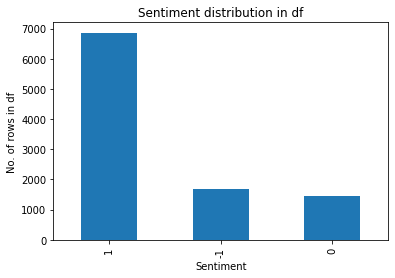

In [ ]:
import matplotlib.pyplot as plt 

print("Number of rows per star rating:")
print(top_data_df['stars'].value_counts())

def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1

top_data_df['sentiment'] = [ map_sentiment(x) for x in top_data_df['stars']]

plt.figure()
pd.value_counts(top_data_df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

SEGREGATING THE DATA BASED ON SENTIMENT:

A function to retrieve the top few records for each sentiment is written. The top few rows contain the data with sentiment = 1, middle rows contain data with sentiment = -1, bottom rows contain data with sentiment = 0.

In [ ]:
def get_top_data(top_n = 5000):
    top_data_df_positive = top_data_df[top_data_df['sentiment'] == 1].head(top_n)
    top_data_df_negative = top_data_df[top_data_df['sentiment'] == -1].head(top_n)
    top_data_df_neutral = top_data_df[top_data_df['sentiment'] == 0].head(top_n)
    top_data_df_new = pd.concat([top_data_df_positive, top_data_df_negative, top_data_df_neutral])
    return top_data_df_new


top_data_df_new = get_top_data(top_n=10000)

print("After segregating and taking equal number of rows for each sentiment:")
print(top_data_df_new['sentiment'].value_counts())
top_data_df_new.head(10)

After segregating and taking equal number of rows for each sentiment:
 1    6863
-1    1676
 0    1461
Name: sentiment, dtype: int64


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,1
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,1
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0,1
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,1
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,1


In [ ]:
top_data_df_new

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,1
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,1
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9967,qNqvJIH4_KENAajUfRZKoA,2012-10-29,UoxTfwbLylXWpwrn8tYEeQ,3,I thought I had reviewed this location already...,review,VPXgY9lGJF3XC4ZpusxNuA,1,1,1,0
9968,HIiVx2mseVWKtx8TKfWC_A,2010-06-07,TrFMPwWeaCWu8yDVWVkYwA,3,I have never been here before so I didn't know...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,2,1,0
9976,iDYzGVIF1TDWdjHNgNjCVw,2009-09-11,bKjMcpNj0xSu2UI2EFQn1g,3,I was looking for chile rellenos and this plac...,review,2tUCLMHQKz4kA1VlRB_w0Q,0,0,0,0
9983,24V8QQWO6VaVggHdxjQQ_A,2010-06-06,PqiIeFOiVr-tj_FtHGAH2g,3,3.5 stars. \n\nWe decided to check this place ...,review,LaEj3VpQh7bgpAZLzSRRrw,1,4,1,0


TOKENIZATION:

Process of splitting the review string into a list of tokens.

In [ ]:
from gensim.utils import simple_preprocess

top_data_df_new['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_new['text']] 
print(top_data_df_new['tokenized_text'].head(10))


0    [my, wife, took, me, here, on, my, birthday, f...
1    [have, no, idea, why, some, people, give, bad,...
2    [love, the, gyro, plate, rice, is, so, good, a...
3    [rosie, dakota, and, love, chaparral, dog, par...
4    [general, manager, scott, petello, is, good, e...
5    [quiessence, is, simply, put, beautiful, full,...
6    [drop, what, you, re, doing, and, drive, here,...
7    [luckily, didn, have, to, travel, far, to, mak...
8    [definitely, come, for, happy, hour, prices, a...
9    [nobuo, shows, his, unique, talents, with, eve...
Name: tokenized_text, dtype: object


STEMMING:

Process of reducing the tokenized text to its root word.

In [ ]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()

top_data_df_new['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in top_data_df_new['tokenized_text'] ]
top_data_df_new['stemmed_tokens'].head(10)

0    [my, wife, took, me, here, on, my, birthdai, f...
1    [have, no, idea, why, some, peopl, give, bad, ...
2    [love, the, gyro, plate, rice, is, so, good, a...
3    [rosi, dakota, and, love, chaparr, dog, park, ...
4    [gener, manag, scott, petello, is, good, egg, ...
5    [quiessenc, is, simpli, put, beauti, full, win...
6    [drop, what, you, re, do, and, drive, here, af...
7    [luckili, didn, have, to, travel, far, to, mak...
8    [definit, come, for, happi, hour, price, ar, a...
9    [nobuo, show, hi, uniqu, talent, with, everyth...
Name: stemmed_tokens, dtype: object

SPLITTING OF TRAIN, TEST DATA:



In [ ]:
from sklearn.model_selection import train_test_split
def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_new[['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'stemmed_tokens']], 
                                                        top_data_df_new['sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_new)

Value counts for Train sentiments
 1    4786
-1    1164
 0    1050
Name: sentiment, dtype: int64
Value counts for Test sentiments
 1    2077
-1     512
 0     411
Name: sentiment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index             business_id  cool        date  funny  \
0   3236  rDvz5jX65gpfONFu7er9Tw     0  2010-08-03      1   
1   1646  UI5ghIUeHYxzwSfaDVUXOA     0  2012-02-16      0   
2   2916  G1_uulnhkAUBsaMAlJFc_g     1  2010-11-09      0   
3   2781  QbqJEXdngh_9fwqVTI0CJQ     0  2010-04-22      0   
4   3390  MPziC5MO2QQiYVAMM3fdSw     0  2012-09-16      0   

                review_id  stars  \
0  3VY7iN1LIqFX_CsM4gHMTg      4   
1  NMXfzmoPJgDlbF1x7E5Ppw      4   
2  sj3YyLFa2tFbv3NvwLyvvA      2   
3  oUw363cdW8aSYQUG5vmPMw      4   
4  jyVAxH_cInITZQ_Xvb5Biw      5   

                                                text  useful  \
0  I am not a fan of american mexican food, good ...       0   
1  Had an opportunity

Setting the runtime to have GPU as the hardware accelerator:

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)


Device available for running: 
cuda


INITIALIZING ANN WITH LOSSFUNCTION AND ACTIVATION FUNCTION FOR EVERY LAYER:

Loss function: Linear

Activation function: {Relu(for hidden layers)  Softmax(for output layer)}

In [ ]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()

        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)

        out = self.fc2(out)
        out = self.relu2(out)

        out = self.fc3(out)

        return F.softmax(out, dim=1)

In [ ]:
from gensim import corpora

def make_dict(top_data_df_small, padding=True):
    if padding:
        print("Dictionary with padded token added")
        review_dict = corpora.Dictionary([['pad']])
        review_dict.add_documents(top_data_df_small['stemmed_tokens'])
    else:
        print("Dictionary without padding")
        review_dict = corpora.Dictionary(top_data_df_small['stemmed_tokens'])
    return review_dict


review_dict = make_dict(top_data_df_new, padding=False)


Dictionary without padding


In [ ]:
VOCAB_SIZE = 10000
NUM_LABELS = 3

def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[review_dict.token2id[word]] += 1
    return vec.view(1, -1).float()

In [ ]:
def make_target(label):
    if label == -1:
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == 0:
        return torch.tensor([1], dtype=torch.long, device=device)
    else:
        return torch.tensor([2], dtype=torch.long, device=device)

In [ ]:
VOCAB_SIZE = len(review_dict)

input_dim = VOCAB_SIZE
hidden_dim = 500
output_dim = 3
num_epochs = 100

ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
ff_nn_bow_model.to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=0.001)

In [ ]:
OUTPUT_FOLDER='/content/drive/MyDrive/Untitled folder/'
ffnn_loss_file_name = OUTPUT_FOLDER + 'ffnn_bow_class_big_loss_500_epoch_100_less_lr.csv'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss')
f.write('\n')
losses = []
iter = 0

for epoch in range(num_epochs):
    if (epoch+1) % 25 == 0:
        print("Epoch completed: " + str(epoch+1))
    train_loss = 0
    for index, row in X_train.iterrows():
        optimizer.zero_grad()

        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
       
        probs = ff_nn_bow_model(bow_vec)

        target = make_target(Y_train['sentiment'][index])

        loss = loss_function(probs, target)

        train_loss += loss.item()

        loss.backward()

        optimizer.step()
    f.write(str((epoch+1)) + "," + str(train_loss / len(X_train)))
    f.write('\n')
    train_loss = 0

f.close()
    

Epoch completed: 25
Epoch completed: 50
Epoch completed: 75
Epoch completed: 100


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           1       0.00      0.00      0.00       411
           2       0.69      1.00      0.82      2077

    accuracy                           0.69      3000
   macro avg       0.23      0.33      0.27      3000
weighted avg       0.48      0.69      0.57      3000

100
Index(['iter', ' loss'], dtype='object')


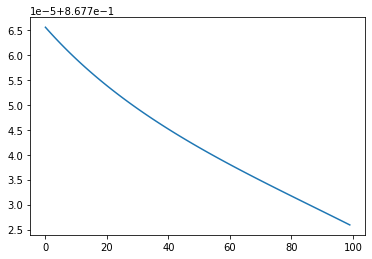

In [ ]:
from sklearn.metrics import classification_report
bow_ff_nn_predictions = []
original_lables_ff_bow = []
with torch.no_grad():
    for index, row in X_test.iterrows():
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])
        probs = ff_nn_bow_model(bow_vec)
        bow_ff_nn_predictions.append(torch.argmax(probs, dim=1).cpu().numpy()[0])
        original_lables_ff_bow.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])
print(classification_report(original_lables_ff_bow,bow_ff_nn_predictions))
ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)
print(len(ffnn_loss_df))
print(ffnn_loss_df.columns)
ffnn_plt_500_padding_100_epochs = ffnn_loss_df[' loss'].plot()
fig = ffnn_plt_500_padding_100_epochs.get_figure()
fig.savefig(OUTPUT_FOLDER + 'plots/' + "ffnn_bow_loss_500_padding_100_epochs_less_lr.pdf")